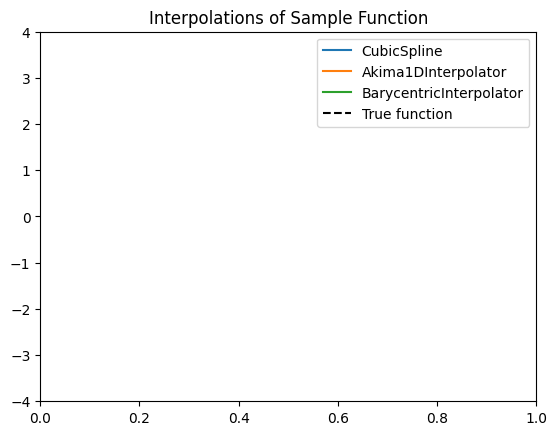

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, Akima1DInterpolator, BarycentricInterpolator
from matplotlib.animation import FuncAnimation

# Define the sample function
def sample_function(x):
    return (np.tan(x) * np.sin(30 * x)) * np.exp(x)

# Generate the x-axis values for the function
x = np.linspace(-5, 5, 1000)

# Generate a list of the number of points to sample for the animation
n_values = np.arange(5, 1000, 10)

# Define the figure and axes for the animation
fig, ax = plt.subplots()

# Define the empty line objects for the interpolations
cubic_interp_line, = ax.plot([], [], label="CubicSpline")
akima_interp_line, = ax.plot([], [], label="Akima1DInterpolator")
bary_interp_line, = ax.plot([], [], label="BarycentricInterpolator")
true_function_line, = ax.plot([], [], 'k--', label="True function")

# Define the title and legend for the plot
ax.set_title("Interpolations of Sample Function")
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(-4,4)

# Define the function that will update the plot for each frame of the animation
def update(n_points):
    # Sample the function
    x_sample = np.linspace(-5, 5, n_points)
    y_sample = sample_function(x_sample)

    # Calculate the true function values for the x-axis
    y_true = sample_function(x)

    # Interpolate the sampled function using the various methods
    cubic_interp = CubicSpline(x_sample, y_sample)
    akima_interp = Akima1DInterpolator(x_sample, y_sample)
    bary_interp = BarycentricInterpolator(x_sample, y_sample)

    # Calculate the interpolated values for the x-axis
    cubic_y = cubic_interp(x)
    akima_y = akima_interp(x)
    bary_y = bary_interp(x)

    # Update the lines with the interpolated values for this frame
    cubic_interp_line.set_data(x, cubic_y)
    akima_interp_line.set_data(x, akima_y)
    bary_interp_line.set_data(x, bary_y)
    true_function_line.set_data(x, y_true)

# Define the animation object
ani = FuncAnimation(fig, update, frames=n_values)

# Show the plot
plt.show()


In [98]:
# import numpy as np

# def create_linear_eq(points):
#     # Convert the list of points into a matrix
#     A = np.vstack([np.array([p[0], 1]) for p in points])
#     b = np.array([p[1] for p in points])

#     # Solve the system of linear equations using numpy.linalg
#     x = np.linalg.solve(A, b)

#     # Return the equation as a string in slope-intercept form (y = mx + b)
#     return f"y = {x[0]}x + {x[1]}"